In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

/home/anthony/workspace/yt-data


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 820 total files
Found 819 jpgs


100%|██████████| 819/819 [00:00<00:00, 999.88it/s] 


<Figure size 640x480 with 0 Axes>

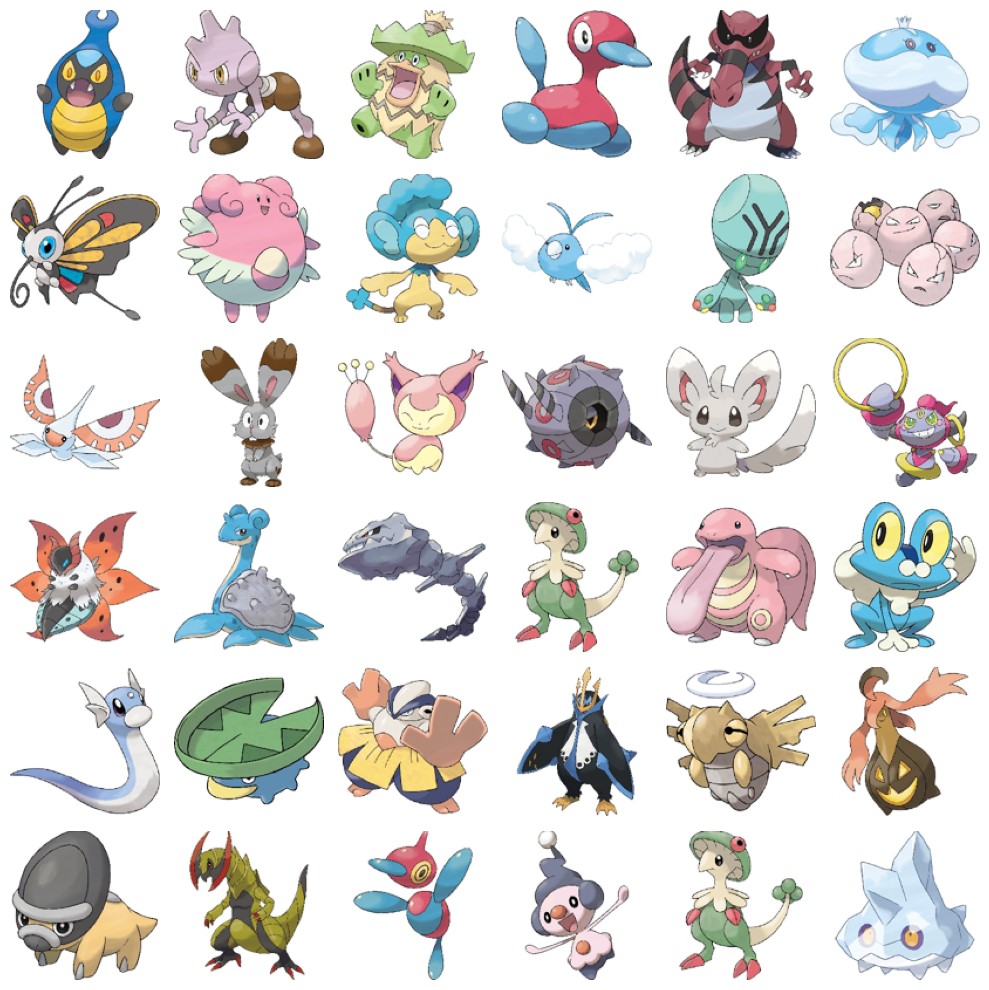

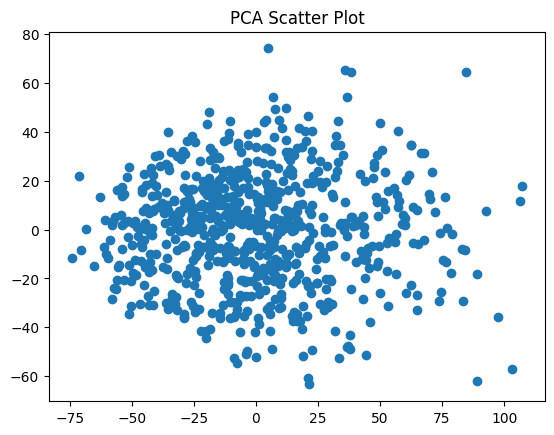

2023-07-01 18:46:02.906198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_1 (InputLayer)                                             [(None, 128, 128, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 input_3 (InputLayer)                                             [(None, 128, 128, 19)]                      0                       []                                     

In [2]:
# from thumbs.experiments.pokemon import PokemonExperiment
from thumbs.experiments.pokemon_conditional import PokemonExperiment
from thumbs.train import load_weights

exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
# load_weights(m.gan, exp.get_params().weight_path)

In [3]:
data = exp.get_data()

In [4]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(data)

In [5]:
prepared = exp.prepare_data(dataset, exp.get_mutable_params()[0])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]], shape=(128, 128, 3), dtype=float32)
tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(19,), dtype=float32)


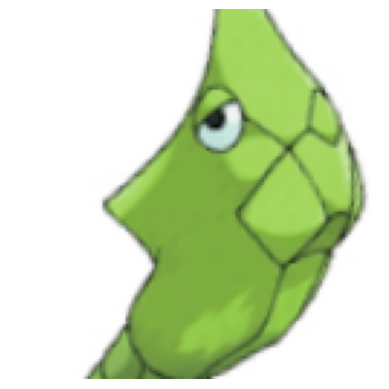

In [40]:

from thumbs.viz import show_samples, visualize_preprocessed_image

item, label = prepared.__iter__().__next__()

print(item[0])
print(label[0])
visualize_preprocessed_image(item[0].numpy())

In [41]:
exp.lookup(['bug'])

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>